In [1]:
import numpy as np 
import pandas as pd 
import re
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
df=pd.read_csv('reviews.csv')
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,I love it. Easy to use. Make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,I love how I could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,Exactly what I needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 1.Lower case

In [3]:
# Convert 'content' column to lowercase
df['content'] = df['content'].str.lower()

df


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"instead of shopping around, i downloaded any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update! this app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible. there are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it. easy to use. make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 2.remove-links

In [4]:
#this code refers to removing the links which consist of http links
text=df['content']
def remove_links(text):
    return re.sub(r'http\S+', '', text)
print(df['content'])

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object


# 3.Remove next lines (\n)

In [5]:
#"\n" refers to the next line and by replacing the "\n" with empty string 
df['content'] = df['content'].str.replace('\n', '')
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"instead of shopping around, i downloaded any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update! this app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible. there are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it. easy to use. make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 4.Words containing numbers 

In [6]:
text=df['content']
def remove_words_with_numbers(text):
    words = text.split() 
    clean_words = [] 
    for word in words:
        has_digit = False
        for char in word:
            if char.isdigit():
                has_digit = True
                break
        if not has_digit:
            clean_words.append(word)  # If the word does not contain any digit, add it to the clean words list
    return ' '.join(clean_words)  # Join the clean words list back to string
df['content'] = df['content'].apply(remove_words_with_numbers)

df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"instead of shopping around, i downloaded any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update! this app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible. there are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it. easy to use. make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 5.extra-space 

In [7]:
#strip() function used to remove trailing whitespaces
df['content'] = df['content'].str.strip()

# 6.remove special character

In [8]:

def remove_special_characters(text):
    special_characters = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    for char in special_characters:
        text = text.replace(char, '')
    return text

df['content'] = df['content'].apply(remove_special_characters)
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead of shopping around i downloaded anydo ...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while out of the blue...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update this app used to be perfect fo...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible there are som...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it easy to use make my life organize i ...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 6.remove emojis

In [9]:
import re
import pandas as pd

def remove_special_characters(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)#any match found by the emoji_pattern will be replaced with nothing


df['content'] = df['content'].apply(remove_special_characters)

df


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead of shopping around i downloaded anydo ...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while out of the blue...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update this app used to be perfect fo...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible there are som...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it easy to use make my life organize i ...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 7.removal of stop word(using genism package)

In [10]:
from gensim.parsing.preprocessing import preprocess_string
df['content'] = [' '.join(preprocess_string(text)) for text in df['content']]
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task dai need todolist remind buzz time ...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop download anydo wide set dai sched...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,blue app ask updat acct email task list lost t...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app perfect plan certain task co...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl nice design featur lik...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excel app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easi us life organ love wai photo locat d...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love plan check app everydai love,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactli need,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 8.Stemming

In [11]:
# NLTK's tokenization functionalities
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/yashas.m/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


#Tokenization is the process of breaking down a text or document into smaller units

ps = PorterStemmer() #PorterStemmer is used for stemming, which is the process of reducing words to their base or root form


def stem_sentence(sentence):
    words = word_tokenize(sentence) 
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)


df['content'] = df['content'].apply(stem_sentence)

df


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task dai need todolist remind buzz time ...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop download anydo wide set dai sched...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,blue app ask updat acct email task list lost t...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app perfect plan certain task co...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl nice design featur lik...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excel app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easi us life organ love wai photo locat d...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love plan check app everydai love,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactli need,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


# 9.Lematization

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatize each token in the list of tokens
    return ' '.join(lemmatized_tokens)


df['content'] = df['content'].apply(lemmatize_text)
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task dai need todolist remind buzz time ...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop download anydo wide set dai sched...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,blue app ask updat acct email task list lost t...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app perfect plan certain task co...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl nice design featur lik...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excel app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easi u life organ love wai photo locat de...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love plan check app everydai love,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactli need,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


**lexicon sentimental analysis

In [20]:
pip install afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=663887eda066f7693ed6e82a6810f042333bbee49748973c77f08f4343572839
  Stored in directory: /Users/yashas.m/Library/Caches/pip/wheels/79/91/ee/8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
from afinn import Afinn
import nltk
import pandas as pd

text = df['content']

# The AFINN lexicon is a list of English words rated for valence with an integer between -5 (negative) and +5 (positive)
afinn = Afinn()

# Tokenize the text into words
words = nltk.word_tokenize(" ".join(text)) # Combine all text into one string before tokenizing

# Count positive, negative, and neutral words
positive_count = 0
negative_count = 0
neutral_count = 0
positive_words = []
negative_words = []
neutral_words = []
for word in words:
    score = afinn.score(word)
    if score > 0:
        positive_words.append(word)#store the positive words
        positive_count += 1
    elif score < 0:
        negative_words.append(word) #store the negative words
        negative_count += 1
    else:
        neutral_words.append(word) #store  the neutral words
        neutral_count += 1

# Calculate percentages
total_words = len(words)
print(total_words)
positive_percentage = (positive_count / total_words) * 100
negative_percentage = (negative_count / total_words) * 100
neutral_percentage = (neutral_count / total_words) * 100

print("Positive words percentage:", positive_percentage)
print("Negative words percentage:", negative_percentage)
print("Neutral words percentage:", neutral_percentage)


330690
Positive words percentage: 9.492273730684326
Negative words percentage: 3.3913937524569837
Neutral words percentage: 87.11633251685869


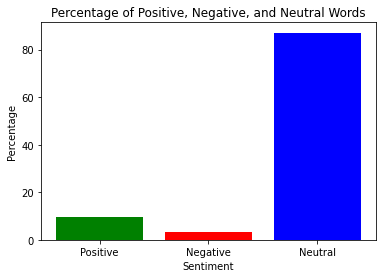

In [31]:
import matplotlib.pyplot as plt

# Plot the graph
labels = ['Positive', 'Negative', 'Neutral']
percentages = [positive_percentage, negative_percentage, neutral_percentage]

plt.bar(labels, percentages, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Percentage of Positive, Negative, and Neutral Words')
plt.show()


[nltk_data] Downloading package punkt to /Users/yashas.m/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


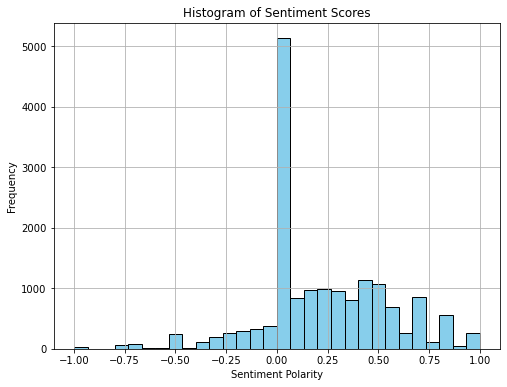

In [63]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt


nltk.download('vader_lexicon')

# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'content' column
df['sentiment'] = df['content'].apply(get_sentiment)

# Histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [67]:
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task dai need todolist remind buzz time ...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,-0.166667
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop download anydo wide set dai sched...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,-0.140000
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,blue app ask updat acct email task list lost t...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,0.068182
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app perfect plan certain task co...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,0.271429
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl nice design featur lik...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excel app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner,0.000000
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easi u life organ love wai photo locat de...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner,0.550000
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love plan check app everydai love,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner,0.500000
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactli need,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner,0.000000


In [66]:
print(f"positive words number:{positive_count}")
print(f"negative words number :{negative_count}")
print(f"neutral words number:{neutral_count}")

positive words number:31390
negative words number :11215
neutral words number:288085


In [32]:
pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 2.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Assuming your dataset has a column named 'content' containing the text data
text = " ".join(df['content'])

# Generate the word cloud with a TrueType font specified
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='HoodBrothers-Yo9y.ttf').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Content Column')
plt.show()


ValueError: Only supported for TrueType fonts